In [1]:
import sys
import os
sys.path.append('../gNN')
import torch as th
import graph1d.generate_normalized_graphs as gng
import graph1d.generate_dataset as dset
import tools.io_utils as io
from network1d.meshgraphnet import MeshGraphNet
import json
import shutil
import numpy as np
import pathlib
from network1d.rollout import rollout
import tools.plot_tools as pt
import matplotlib.pyplot as plt
import network1d.tester as tester

In [2]:
# load the model and the dataset

path = '../models/21.01.2024_09.34.02/'

dataset, gnn_model, params = tester.get_dataset_and_gnn(path, graphs_folder= 'graphs_rm/' ,data_location='../data/')

if os.path.exists('results'):
    shutil.rmtree('results')


../data/graphs_rm/


Loading graphs: 100%|██████████| 278/278 [00:02<00:00, 103.55it/s]


Normalize graphs


Add deltas: 100%|██████████| 277/277 [00:00<00:00, 26196.08it/s]


Normalize graphs


Processing dataset: 100%|██████████| 221/221 [00:00<00:00, 1238.22it/s]


	Dataset generated in 0.18 s


Processing dataset: 100%|██████████| 56/56 [00:00<00:00, 1149.93it/s]


	Dataset generated in 0.05 s
Train size = 221
Test size = 56


In [11]:
# Rollout errors on train and test set

norm_err_train, err_train, _  = tester.evaluate_all_models(dataset, 'train', gnn_model, params)
norm_err_test, err_test, _ = tester.evaluate_all_models(dataset, 'test', gnn_model, params, True)
print('========================')
print('Final rollout error on train set: ', err_train)
print('Final rollout error on test set: ', err_test)

==========train==========
model name = k_20.37.grph
Errors
[0.03393285]
model name = k_58.87.grph
Errors
[0.01507232]
model name = k_48.78.grph
Errors
[0.01973462]
model name = k_51.21.grph
Errors
[0.01396541]
model name = k_70.54.grph
Errors
[0.01909405]
model name = k_1.54.grph
Errors
[0.00729291]
model name = k_16.73.grph
Errors
[0.05669479]
model name = k_64.25.grph
Errors
[0.0151943]
model name = k_46.76.grph
Errors
[0.07717638]
model name = k_81.39.grph
Errors
[0.01986844]
model name = k_35.14.grph
Errors
[0.02279563]
model name = k_30.42.grph
Errors
[0.01362426]
model name = k_12.13.grph
Errors
[0.10242642]
model name = k_91.5.grph
Errors
[0.01292766]
model name = k_78.57.grph
Errors
[0.01273444]
model name = k_4.68.grph
Errors
[0.03319505]
model name = k_27.76.grph
Errors
[0.02975799]
model name = k_18.8.grph
Errors
[0.01898664]
model name = k_47.54.grph
Errors
[0.01193827]
model name = k_48.95.grph
Errors
[0.02147482]
model name = k_49.39.grph
Errors
[0.02142601]
model name = 

{'bc_type': 'heat', 'statistics': {'normalization_type': {'features': 'normal', 'labels': 'normal'}, 'flux': {'min': 0.0, 'max': 15.609663963317871, 'mean': 1.3775150775909424, 'stdv': 2.3477094173431396}, 'nodes': {'min': 5, 'max': 5, 'mean': 5.0, 'stdv': 0.0}, 'dflux': {'min': -0.5669970512390137, 'max': 0.5670862197875977, 'mean': 0.003745179856196046, 'stdv': 0.11084173619747162}}, 'node_features': ['k', 'interface_length'], 'latent_size_gnn': 16, 'latent_size_mlp': 16, 'process_iterations': 3, 'number_hidden_layers_mlp': 2, 'learning_rate': 0.01, 'batch_size': 32, 'lr_decay': 0.001, 'nepochs': 500, 'weight_decay': 1e-05, 'rate_noise': 5, 'rate_noise_features': 1e-05, 'stride': 5, 'nout': 1, 'infeat_nodes': 4, 'infeat_edges': 2, 'out_size': 1, 'train_split': ['k_20.37.grph', 'k_58.87.grph', 'k_48.78.grph', 'k_51.21.grph', 'k_70.54.grph', 'k_1.54.grph', 'k_16.73.grph', 'k_64.25.grph', 'k_46.76.grph', 'k_81.39.grph', 'k_35.14.grph', 'k_30.42.grph', 'k_12.13.grph', 'k_91.5.grph', 'k_7

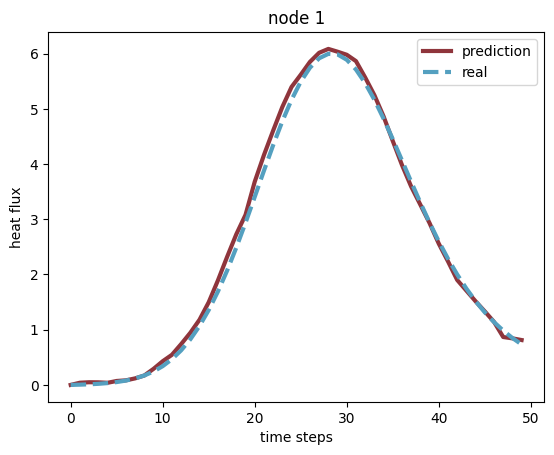

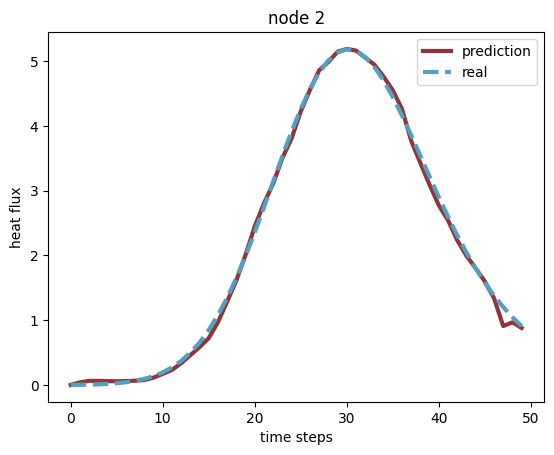

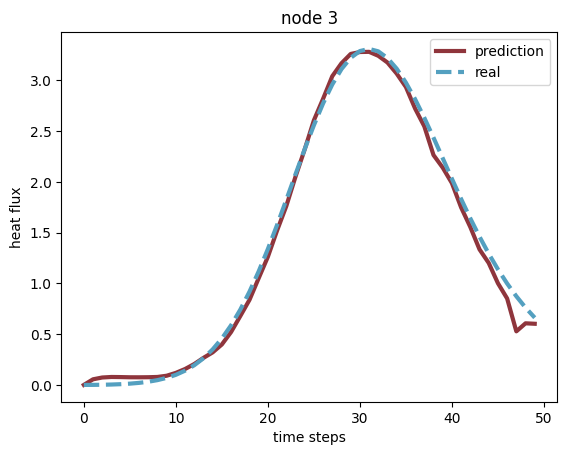

Rollout error :  [0.02342636]


In [3]:
# test the model on a single graph from the train or test set
split = 'train' # 'train' or 'test'
graph_idx = -1 # -1 for random graph, otherwise the index of the graph in the dataset

err = tester.plot_predictions(dataset, 'test', gnn_model, params, graph_idx=-1)
print('Rollout error : ', err )

../data/graphs_new/


Loading graphs:   0%|          | 0/14 [00:00<?, ?it/s]

Loading graphs: 100%|██████████| 14/14 [00:00<00:00, 117.72it/s]


Compute statistics


flux: 100%|██████████| 13/13 [00:00<00:00, 5649.19it/s]


Normalize graphs


Add deltas: 100%|██████████| 13/13 [00:00<00:00, 9613.18it/s]


Compute statistics


dflux: 100%|██████████| 13/13 [00:00<00:00, 7073.94it/s]


Normalize graphs


Add features: 100%|██████████| 13/13 [00:00<00:00, 6544.95it/s]


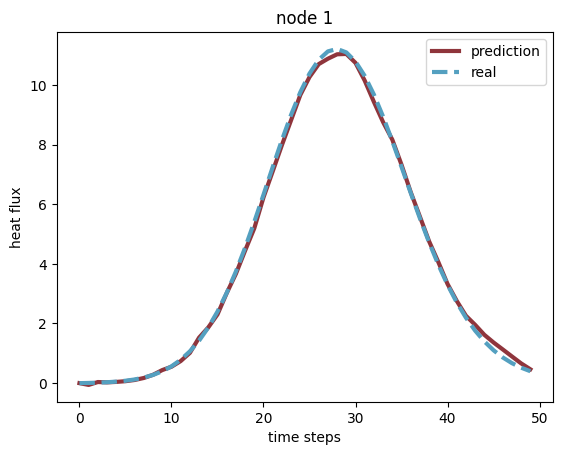

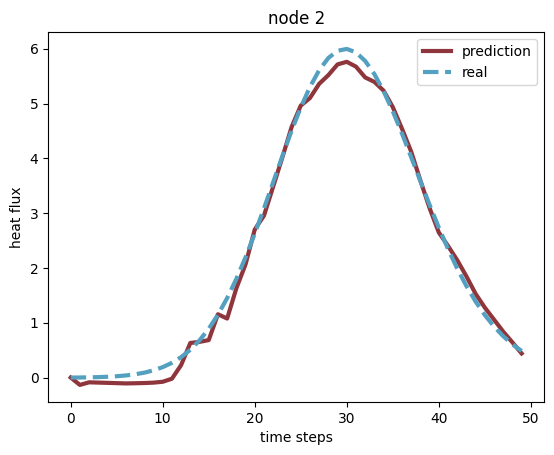

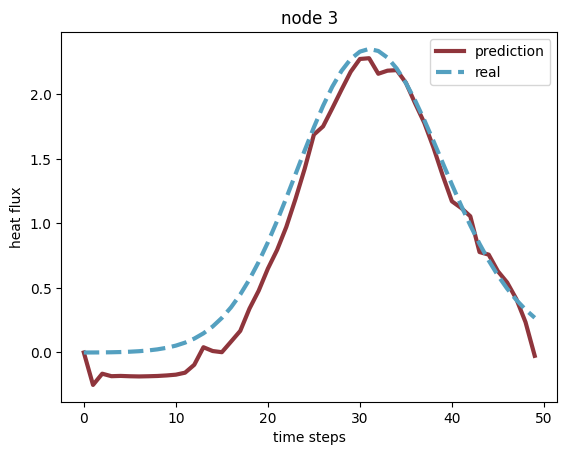

Rollout error :  [0.02358906]


In [13]:
# test the model on a new graph

new_graph = 'k_67.44.grph'

err = tester.test_new_graphs(path, new_graph, data_location='../data/')
print('Rollout error : ', err)